In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from datetime import timedelta
from time import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1=  pd.read_csv("/content/drive/MyDrive/elai/ahemadnagar_2010_2022.csv")
df1.head()

District Name Variety  Min Price  Max Price  Modal Price  Price Date
0    Ahmednagar   Other        400       2350          1400  02-Jan-10
1    Ahmednagar   Other        200       2000          1100  04-Jan-10
2    Ahmednagar   Other        400       1900          1200  07-Jan-10
3    Ahmednagar   Other        300       1900          1100  09-Jan-10
4    Ahmednagar   Other        300       1700          1000  11-Jan-10

In [3]:
df_red = df1[df1['Variety'] == 'Red']
df_other = df1[df1['Variety'] == 'Other']

In [4]:
df_other.to_csv('/content/drive/MyDrive/elai/Ahemadnagar_other.csv', index=False)

In [5]:
df_red.to_csv('/content/drive/MyDrive/elai/Red_ahemadnagar.csv', index=False)

In [ ]:
df1.isna().sum()

District Name    0
Market Name      0
Variety          0
Min Price        0
Max Price        0
Modal Price      0
Price Date       0
dtype: int64

In [ ]:
df1.dtypes

District Name            object
Market Name              object
Variety                  object
Min Price                 int64
Max Price                 int64
Modal Price               int64
Price Date       datetime64[ns]
dtype: object

In [ ]:
df1.describe()

Min Price     Max Price   Modal Price 
count  3701.000000   3701.000000   3701.000000
mean    684.204539   1805.603621   1486.334504
std     541.827920   1411.087324   1112.947150
min      41.000000    201.000000    101.000000
25%     301.000000    899.000000    740.000000
50%     501.000000   1401.000000   1150.000000
75%     900.000000   2300.000000   1851.000000
max    5005.000000  31825.000000   8625.000000

In [ ]:
df_red=  pd.read_excel("/content/drive/MyDrive/elai/redvariety.xlsx")
df_red.head()

Price Date  Max Price
0 2022-12-31       1808
1 2022-12-30       1715
2 2022-12-29       1900
3 2022-12-28       2025
4 2022-12-26       2169

In [ ]:
df_other=  pd.read_excel("/content/drive/MyDrive/elai/othervariety.xlsx")
df_other.head()

Price Date  Max Price
0 2022-12-31       1360
1 2022-12-30       1301
2 2022-12-29       1540
3 2022-12-28       1561
4 2022-12-26       1640

In [ ]:
df_red.describe()

Max Price
count   1382.000000
mean    1955.753980
std     1449.220682
min      228.000000
25%      901.000000
50%     1528.000000
75%     2708.500000
max    11111.000000

In [ ]:
df_other.describe()

Max Price
count   2319.000000
mean    1716.122035
std     1380.431740
min      201.000000
25%      898.000000
50%     1360.000000
75%     2000.500000
max    31825.000000

In [ ]:
df_red.dtypes

Price Date    datetime64[ns]
Max Price              int64
dtype: object

In [ ]:
df_red['Price Date'] = pd.to_datetime(df_red['Price Date'],infer_datetime_format=True) #convert from string to datetime
id = df_red.set_index(['Price Date'])
id.head()

Max Price
Price Date           
2022-12-31       1808
2022-12-30       1715
2022-12-29       1900
2022-12-28       2025
2022-12-26       2169

In [ ]:
df_other['Price Date'] = pd.to_datetime(df_other['Price Date'],infer_datetime_format=True) #convert from string to datetime
id = df_other.set_index(['Price Date'])
id.head()

Max Price
Price Date           
2022-12-31       1360
2022-12-30       1301
2022-12-29       1540
2022-12-28       1561
2022-12-26       1640

In [ ]:
monthly_data_red = df_red.resample('M', on='Price Date').mean()
monthly_data_red

Max Price
Price Date             
2010-01-31  1581.000000
2010-02-28  1052.833333
2010-03-31   692.933333
2010-04-30          NaN
2010-05-31          NaN
...                 ...
2022-08-31          NaN
2022-09-30          NaN
2022-10-31          NaN
2022-11-30  2298.750000
2022-12-31  2155.040000

[156 rows x 1 columns]

In [ ]:
monthly_data_other = df_other.resample('M', on='Price Date').mean()
monthly_data_other

Max Price
Price Date             
2010-01-31  1613.545455
2010-02-28  1096.333333
2010-03-31   805.466667
2010-04-30   624.166667
2010-05-31   711.764706
...                 ...
2022-08-31  1434.739130
2022-09-30  1543.272727
2022-10-31  2264.882353
2022-11-30  2568.363636
2022-12-31  1452.880000

[156 rows x 1 columns]

In [ ]:
monthly_data_other.isnull().sum()

Max Price    10
dtype: int64

In [ ]:
monthly_data_red.isnull().sum()

Max Price    57
dtype: int64

In [ ]:
monthly_data_red = monthly_data_red.dropna()

In [ ]:
# x_labels = df['Price Date']
plt.figure(figsize=(12, 6))
# Plotting
plt.plot(df_red['Price Date'], df_red['Max Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Yearly Price Trend')

plt.show()

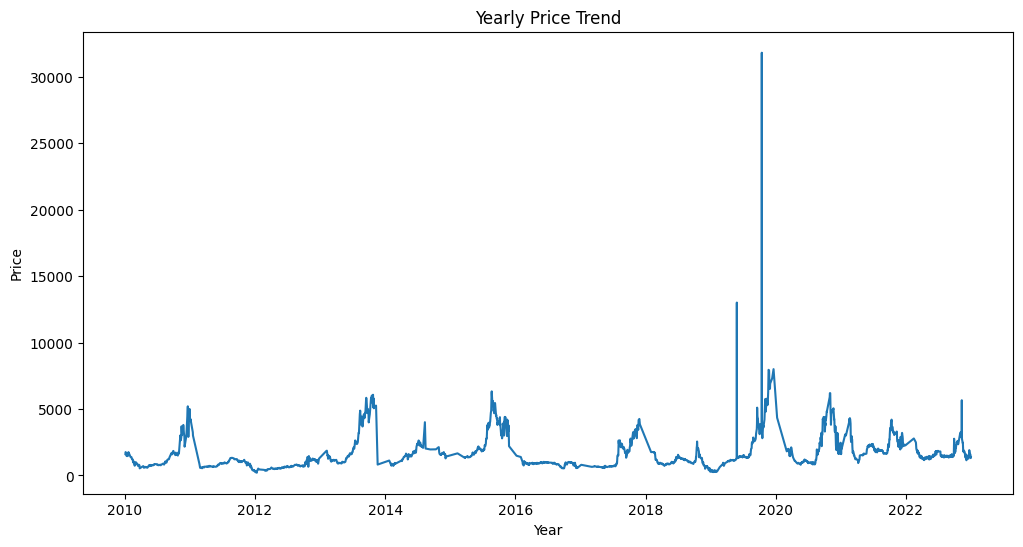

In [ ]:
# x_labels = df['Price Date']
plt.figure(figsize=(12, 6))
# Plotting
plt.plot(df_other['Price Date'], df_other['Max Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Yearly Price Trend')

plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.xlabel('year')
plt.ylabel('Avg price')
plt.title('red onions prices monthly avg prices over Time')
plt.plot(monthly_data_red)

In [ ]:
plt.figure(figsize=(12, 6))
plt.xlabel('year')
plt.ylabel('Avg price')
plt.title('other onions prices monthly avg prices over Time')
plt.plot(monthly_data_other)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller_test= adfuller(df_red['Max Price'])
print("pvalue of adfuller test for red onions is ",adfuller_test[1])
#if the pvalue is greater than 0.05 the series is not stationary

pvalue of adfuller test for red onions is  2.5937521959211674e-05


In [ ]:
adfuller_test= adfuller(df_other['Max Price'])
print("pvalue of adfuller test for other onions is ",adfuller_test[1])

pvalue of adfuller test for other onions is  5.8235956361347006e-06


In [ ]:
adfuller_test= adfuller(monthly_data_red)
print("pvalue of adfuller test for monthly avg for red onions is ",adfuller_test[1])
#if the pvalue is greater than 0.05 the series is not stationary

In [ ]:
adfuller_test= adfuller(monthly_data_other)
print("pvalue of adfuller test for monthly avg for other onions is ",adfuller_test[1])

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

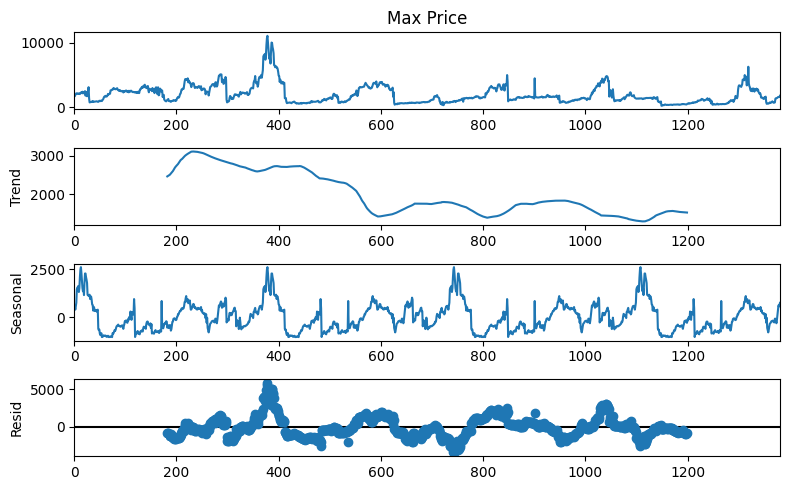

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams['figure.figsize'] = [8, 5]

decompose1 = seasonal_decompose(df_red['Max Price'], model="additive", period=365)
decompose1.plot()
plt.show()


In [ ]:
plt.rcParams['figure.figsize'] = [8, 5]

decompose1=seasonal_decompose(df_other['Max Price'],model="additive",period=365)
decompose1.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
plot_acf(df_red['Max Price'])

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


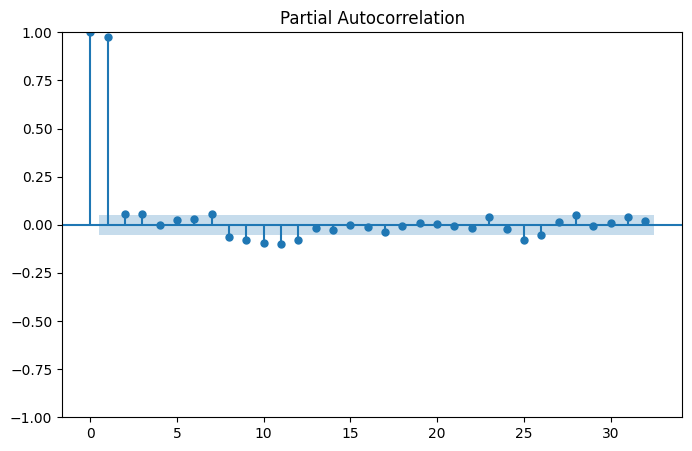

In [ ]:
plot_pacf(df_red['Max Price'])

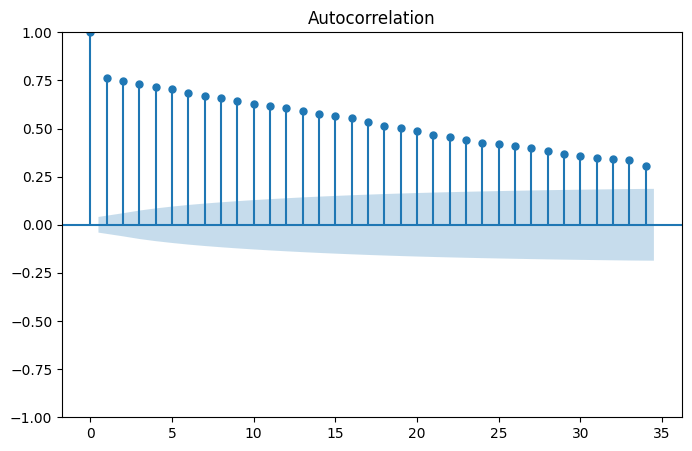

In [ ]:
plot_acf(df_other['Max Price'])

In [ ]:
plot_pacf(df_other['Max Price'])

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
train=df[:3538]
test=df[3538:]

In [ ]:
train

Price Date  Max Price
0    2010-01-01       1786
1    2010-01-04       1591
2    2010-01-05       1601
3    2010-01-05       1601
4    2010-01-06       1755
...         ...        ...
3534 2022-06-27       1800
3535 2022-06-28       1800
3536 2022-06-29       1851
3537 2022-06-30       1800
3538 2022-07-01       1800

[3539 rows x 2 columns]

In [ ]:
import itertools
import statsmodels.api as sm
import pandas as pd
import numpy as np


# Assuming you have a time series dataset named 'data'

# Define the range of values for p, d, and q
p_values = range(0, 4)  # Adjust the range as per your requirement
d_values = range(0, 2)  # Adjust the range as per your requirement
q_values = range(0, 4)  # Adjust the range as per your requirement

# Initialize variables to store best values and metric
best_p = best_d = best_q = None
best_metric = np.inf  # Initialize with a high value for minimization metrics (e.g., AIC, BIC), or 0 for maximization metrics (e.g., RMSE)

# Generate all possible combinations of p, d, and q values
combinations = list(itertools.product(p_values, d_values, q_values))

# Iterate over combinations and fit ARIMA models
for p, d, q in combinations:
  # Fit the ARIMA model
  arima_model = sm.tsa.ARIMA(df_red['Max Price'], order=(p, d, q))
  arima_model_fit = arima_model.fit()
        
  # Calculate the metric (e.g., AIC, BIC, RMSE)
  metric = arima_model_fit.aic  # Replace with your chosen metric
        
  # Check if the current model has a better metric value
  if metric < best_metric:  # Replace the comparison operator as per your metric
   best_p, best_d, best_q = p, d, q
   best_metric = metric
            

# Print the best p, d, and q values and the corresponding metric
print("Best p: ", best_p)
print("Best d: ", best_d)
print("Best q: ", best_q)
print("Best Metric: ", best_metric)


Best p:  3
Best d:  1
Best q:  3
Best Metric:  19999.328606371004


In [ ]:
best_model = ARIMA(df_red['Max Price'], order=(3,1,3)).fit()
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:              Max Price   No. Observations:                 1382
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -9992.664
Date:                Sat, 13 May 2023   AIC                          19999.329
Time:                        10:58:03   BIC                          20035.943
Sample:                             0   HQIC                         20013.025
                               - 1382                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6667      0.086      7.720      0.000       0.497       0.836
ar.L2          0.6924      0.115      6.019      0.000       0.467       0.918
ar.L3         -0.8016      0.068    -11.770      0.0

In [ ]:
prediction=best_model.predict(len(df_red),len(df_red)+60)

In [ ]:
#alternative method

from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm import tqdm_notebook
from itertools import product


def optimize_ARIMA(order_list, exog):
    """
        Return dataframe with parameters and corresponding AIC
        
        order_list - list with (p, d, q) tuples
        exog - the exogenous variable
    """
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(exog, order=order).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([order, model.aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p, d, q)', 'AIC']
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
ps = range(0, 8, 1)
d = 1
qs = range(0, 8, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, 1)
    each = tuple(each)
    order_list.append(each)
    
result_df = optimize_ARIMA(order_list, exog=df_red['Max Price'])

result_df

  0%|          | 0/64 [00:00<?, ?it/s]

(p, d, q)           AIC
0   (2, 1, 7)  19991.043271
1   (7, 1, 2)  19991.261932
2   (3, 1, 5)  19991.845562
3   (3, 1, 7)  19992.463011
4   (7, 1, 3)  19992.531512
..        ...           ...
59  (0, 1, 1)  20020.085534
60  (0, 1, 6)  20020.779487
61  (1, 1, 0)  20020.965708
62  (4, 1, 2)  20022.009723
63  (0, 1, 0)  20025.007880

[64 rows x 2 columns]

In [ ]:
best_model11 = SARIMAX(df_red['Max Price'], order=(2,1,7)).fit()
print(best_model11.summary())

                               SARIMAX Results                                
Dep. Variable:              Max Price   No. Observations:                 1382
Model:               SARIMAX(2, 1, 7)   Log Likelihood               -9985.522
Date:                Sat, 13 May 2023   AIC                          19991.043
Time:                        11:04:51   BIC                          20043.349
Sample:                             0   HQIC                         20010.610
                               - 1382                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2705      0.093     13.637      0.000       1.088       1.453
ar.L2         -0.6182      0.094     -6.542      0.000      -0.803      -0.433
ma.L1         -1.3623      0.094    -14.502      0.0

In [ ]:
predictions=best_model11.predict(len(df_red),len(df_red)+60)